## 簡単な演算とファイルへの出力
簡単な演算を行って、結果をファイルに出力します。  
まずは前回同様ファイルをオープンし、olrデータにda_olrという名前をつけます。

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

da_olr = xr.open_dataset("data/olr.day.mean.nc").olr

`mean()`で単純平均を取ることができます。引数には平均を取る軸を指定できます。  
1979年から2008年のデータを切り出して30年平均を描画してみます。

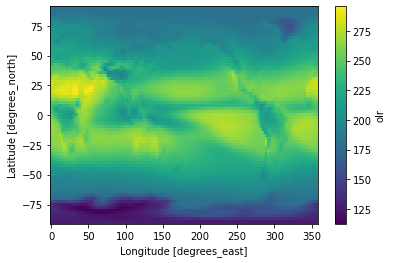

In [3]:
da_olr_clim = da_olr.sel(time=slice("1979-01-01", "2008-12-31")).mean('time')
da_olr_clim.plot()

1979年の偏差を描画してみましょう。四則演算は各要素ごとに行われます。

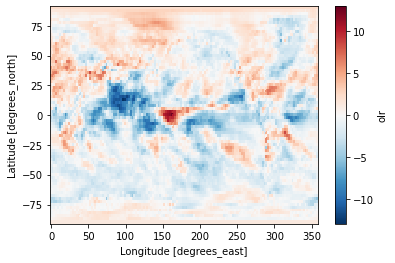

In [4]:
da_olr_anomaly1979 = da_olr_clim - da_olr.sel(time=slice('1979-1-1', '1979-12-31')).mean('time')
da_olr_anomaly1979.plot()

気候値はまた使うかもしれませんので、ファイルに保存しましょう。  
ファイルに保存するには`to_netcdf()`を使います。保存したファイルを開いて、値が保存されていることを確認します。

In [6]:
da_olr_clim.to_netcdf('data/olr_30yr_mean.nc')
da_olr_clim2 = xr.open_dataset("data/olr_30yr_mean.nc").olr
da_olr_clim2

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[180.1943 , 180.1943 , 180.1943 , ..., 180.1943 , 180.1943 , 180.1943 ],
       [181.20346, 181.22734, 181.24532, ..., 180.95576, 180.99136, 181.03462],
       [183.11345, 183.18158, 183.2192 , ..., 182.74414, 182.81023, 182.87827],
       ...,
       [130.52469, 129.9595 , 129.3927 , ..., 133.32693, 132.79341, 132.24603],
       [129.88716, 129.64713, 129.40637, ..., 131.22157, 130.98854, 130.75394],
       [127.29829, 127.29829, 127.29829, ..., 127.29829, 127.29829, 127.29829]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0